In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-2.061032821204833 88.44090130358433
40.49262123146917 137.28446509739717
7.470864937754612 112.4356307362429
-29.956746919414364 -172.4766677172554
-21.778983305337675 152.2472299833625
43.911521812982585 -150.34828100891946
-3.0821491043911067 63.714668903734264
-20.93107354326206 22.029430253737473
19.832842790954913 -178.59700852104567
-50.51538994498024 104.29739011429757
-14.29504667495577 -145.4271885610703
23.821346049928493 89.03309406888059
-1.9298385781419967 80.28351854029381
-36.35429639201608 -135.9994095354049
-83.86586439296984 -104.22075819216556
33.206660344734786 37.99941027732578
29.47101921996247 124.94571672806438
23.914381495792625 176.19809059939382
54.54126496249751 169.34371977321013
-52.666477270587094 -104.91240963666787
88.75304448443313 120.64702815568165
5.254184192458027 150.6436723925163
6.0140812868147435 144.58565822530687
39.91823288941748 166.06113865061207
-84.86297763505358 -32.55190272159936
76.74574546463356 109.57382082087986
-7.303500900672105

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Create an empty list to hold the eather data.
city_data= []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(5)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | meulaboh
Processing Record 2 of Set 1 | oga
Processing Record 3 of Set 1 | miri
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | yeppoon
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | dekar
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | tautira
Processing Record 12 of Set 1 | bheramara
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | yabrud
Processing Record 17 of Set 1 | shenjiamen
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | kavieng
Processing Record 23 of Set 1 | lorengau
Processing Record 24 of Set 1 | severo-kurilsk
Processing Record 25 of Set 1 | u

Processing Record 37 of Set 4 | sokna
Processing Record 38 of Set 4 | mar del plata
Processing Record 39 of Set 4 | omboue
Processing Record 40 of Set 4 | coihaique
Processing Record 41 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 4 | trairi
Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | pathein
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | port lincoln
Processing Record 48 of Set 4 | chik
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 50 of Set 4 | east london
Processing Record 1 of Set 5 | oda
Processing Record 2 of Set 5 | masuguru
Processing Record 3 of Set 5 | kloulklubed
Processing Record 4 of Set 5 | bilma
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | tres arroyos
Processing Record 7 of Set 5 | saint-georges
Processing Record 8 of Set 5 | port moresby
Processing 

Processing Record 24 of Set 8 | kalomo
City not found. Skipping...
Processing Record 25 of Set 8 | maniitsoq
Processing Record 26 of Set 8 | felipe carrillo puerto
Processing Record 27 of Set 8 | bambous virieux
Processing Record 28 of Set 8 | vao
Processing Record 29 of Set 8 | garowe
Processing Record 30 of Set 8 | resistencia
Processing Record 31 of Set 8 | megion
Processing Record 32 of Set 8 | yenagoa
Processing Record 33 of Set 8 | carutapera
Processing Record 34 of Set 8 | tawau
Processing Record 35 of Set 8 | hearst
Processing Record 36 of Set 8 | japura
Processing Record 37 of Set 8 | brits
Processing Record 38 of Set 8 | catuday
Processing Record 39 of Set 8 | rock sound
Processing Record 40 of Set 8 | karamea
City not found. Skipping...
Processing Record 41 of Set 8 | dharchula
Processing Record 42 of Set 8 | marrakesh
Processing Record 43 of Set 8 | dunedin
Processing Record 44 of Set 8 | bonavista
Processing Record 45 of Set 8 | bargal
City not found. Skipping...
Processin

Processing Record 12 of Set 12 | muskogee
Processing Record 13 of Set 12 | yumen
Processing Record 14 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 12 | bukama
Processing Record 16 of Set 12 | powell
Processing Record 17 of Set 12 | babanusah
City not found. Skipping...
Processing Record 18 of Set 12 | beringovskiy
Processing Record 19 of Set 12 | gushikawa
Processing Record 20 of Set 12 | partenit
Processing Record 21 of Set 12 | marzuq
Processing Record 22 of Set 12 | byron bay
Processing Record 23 of Set 12 | gold coast
Processing Record 24 of Set 12 | ponnampet
Processing Record 25 of Set 12 | malanje
Processing Record 26 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 27 of Set 12 | sangar
Processing Record 28 of Set 12 | udobnaya
Processing Record 29 of Set 12 | mount gambier
Processing Record 30 of Set 12 | tamandare
Processing Record 31 of Set 12 | acapulco
Processing Record 32 of Set 12 | pacific grove
Processing Record 33 of

In [12]:
len(city_data)

558

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Meulaboh,4.1363,96.1285,76.24,88,100,7.85,ID,2022-09-30 19:48:02
1,Oga,46.4631,10.3470,47.08,97,100,2.17,IT,2022-09-30 19:48:03
2,Miri,4.4148,114.0089,78.94,94,40,3.44,MY,2022-09-30 19:48:04
3,Vaini,-21.2000,-175.2000,73.56,78,20,9.22,TO,2022-09-30 19:48:04
4,Yeppoon,-23.1333,150.7333,56.98,71,19,2.86,AU,2022-09-30 19:48:05
5,Kodiak,57.7900,-152.4072,44.11,87,0,0.00,US,2022-09-30 19:48:05
6,Victoria,22.2855,114.1577,80.33,92,99,4.00,HK,2022-09-30 19:44:13
7,Dekar,-21.5333,21.9333,75.09,18,2,7.99,BW,2022-09-30 19:48:06
8,Kapaa,22.0752,-159.3190,84.52,78,75,9.22,US,2022-09-30 19:44:22
9,Busselton,-33.6500,115.3333,53.35,82,79,9.44,AU,2022-09-30 19:48:07


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order] 
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Meulaboh,ID,2022-09-30 19:48:02,4.1363,96.1285,76.24,88,100,7.85
1,Oga,IT,2022-09-30 19:48:03,46.4631,10.3470,47.08,97,100,2.17
2,Miri,MY,2022-09-30 19:48:04,4.4148,114.0089,78.94,94,40,3.44
3,Vaini,TO,2022-09-30 19:48:04,-21.2000,-175.2000,73.56,78,20,9.22
4,Yeppoon,AU,2022-09-30 19:48:05,-23.1333,150.7333,56.98,71,19,2.86
...,...,...,...,...,...,...,...,...,...
553,Darhan,MN,2022-09-30 19:53:21,49.4867,105.9228,37.09,89,100,9.37
554,Inhambane,MZ,2022-09-30 19:53:21,-23.8650,35.3833,69.71,84,1,7.00
555,Pervomayskiy,RU,2022-09-30 19:53:21,53.2485,40.2871,55.65,94,77,10.60
556,Baykit,RU,2022-09-30 19:53:22,61.6700,96.3700,26.40,78,31,3.02


In [28]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file,index_label = "City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

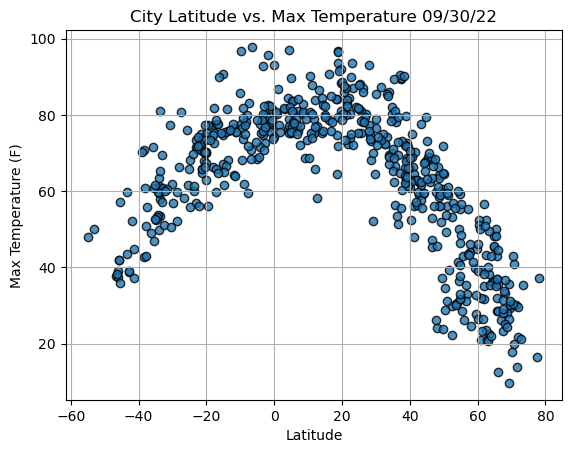

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

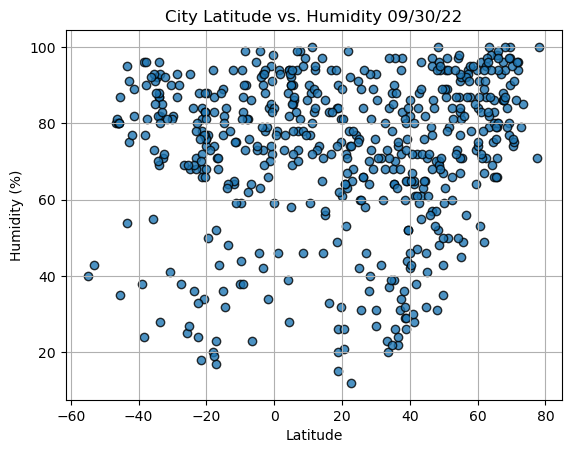

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

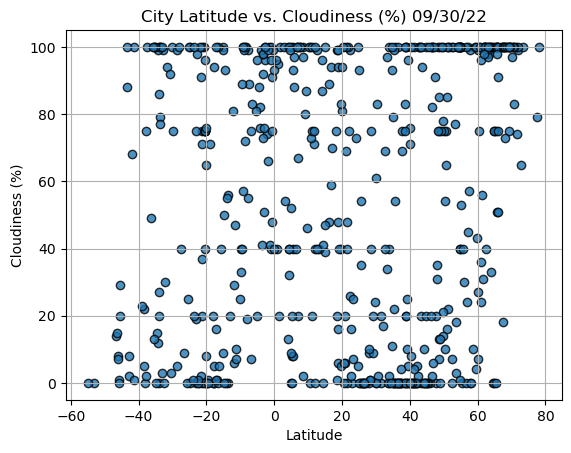

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

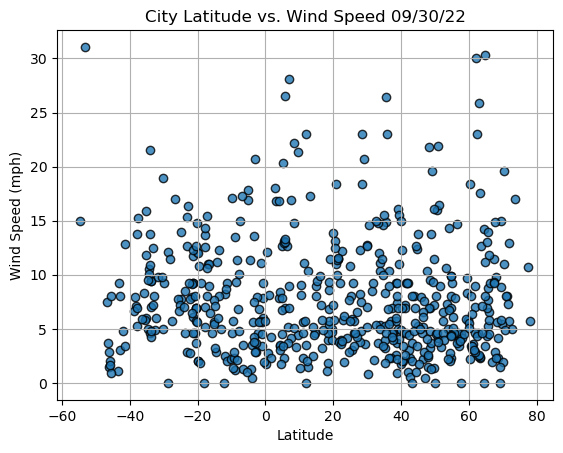

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [35]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [36]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [37]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

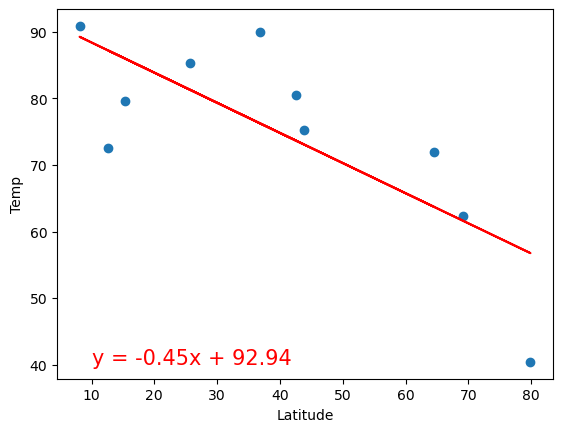

In [38]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [39]:

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2022-09-30 19:48:09
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    73.49
Humidity                       78
Cloudiness                      0
Wind Speed                   15.3
Name: 13, dtype: object

In [41]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
553     True
554    False
555     True
556     True
557    False
Name: Lat, Length: 558, dtype: bool

In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Meulaboh,ID,2022-09-30 19:48:02,4.1363,96.1285,76.24,88,100,7.85
1,Oga,IT,2022-09-30 19:48:03,46.4631,10.3470,47.08,97,100,2.17
2,Miri,MY,2022-09-30 19:48:04,4.4148,114.0089,78.94,94,40,3.44
5,Kodiak,US,2022-09-30 19:48:05,57.7900,-152.4072,44.11,87,0,0.00
6,Victoria,HK,2022-09-30 19:44:13,22.2855,114.1577,80.33,92,99,4.00


In [44]:
# Create Nothern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

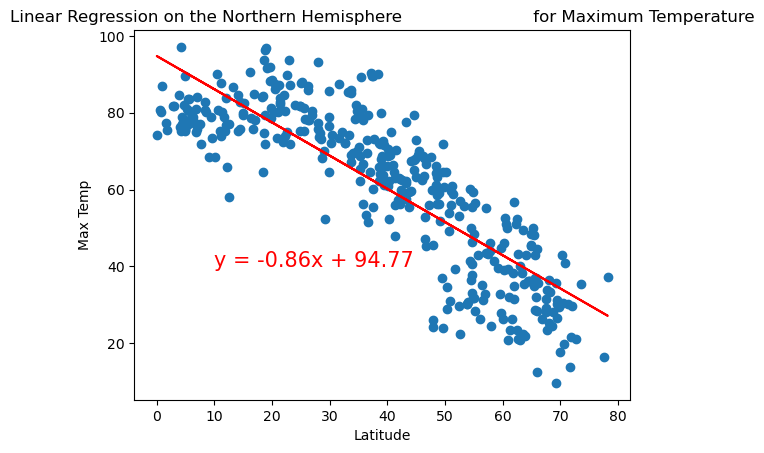

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

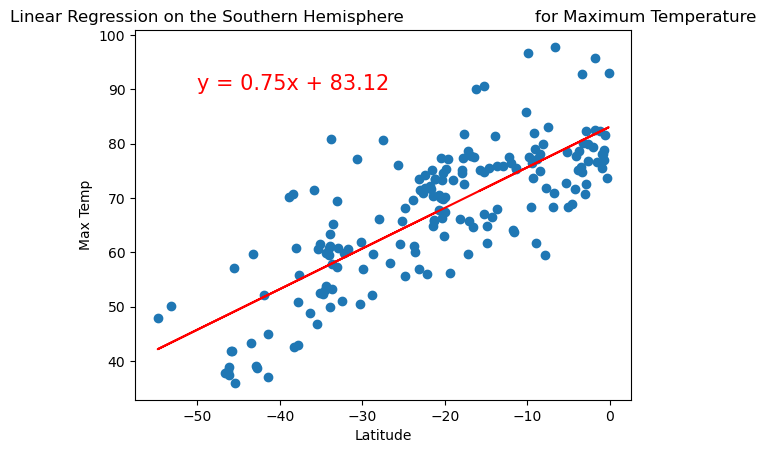

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

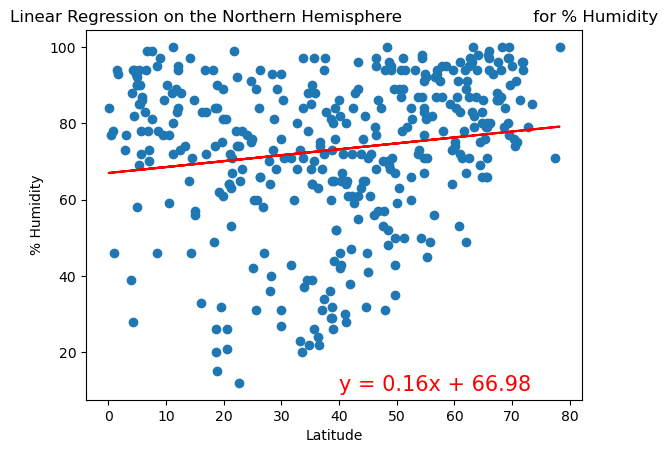

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

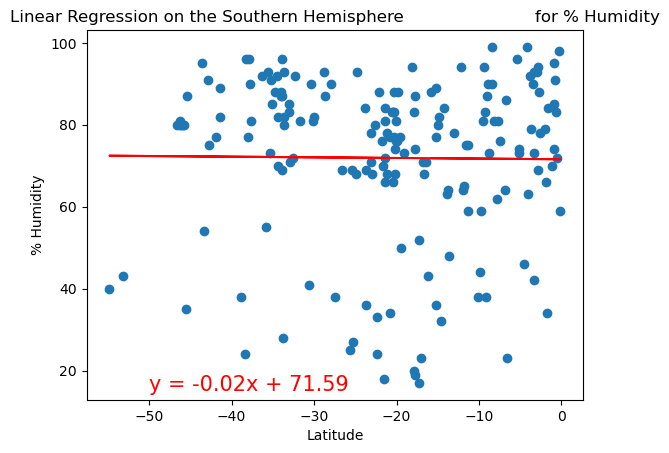

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

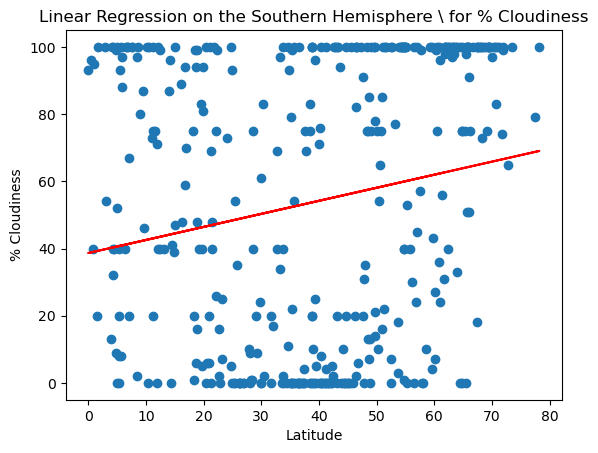

In [50]:
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere \ 
                       for % Cloudiness','% Cloudiness', (-50,15))

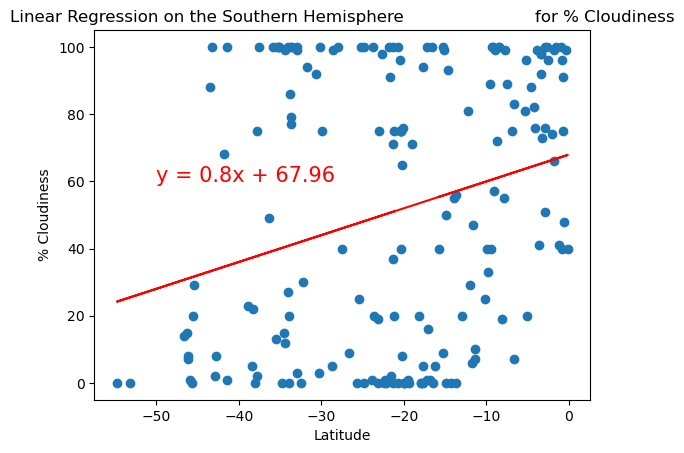

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

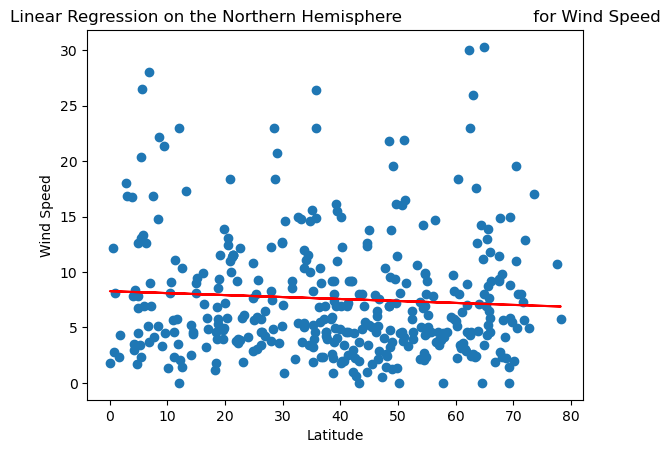

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

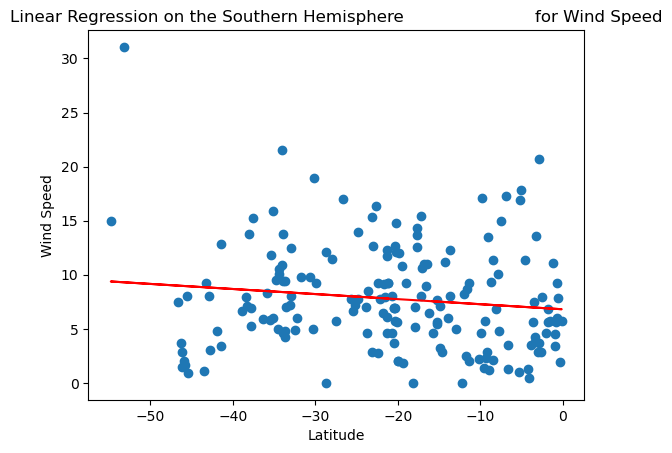

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))